In [5]:
#Loading gensim and nltk libraries
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Cielseal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#method for lemmatization and stemming
def preprocess(text):
    try:
        result = []
        for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
        #print(result)
        return result
    except:
        return []
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


In [6]:
posts = pd.read_csv('twitter_post_3years.csv')
posts.head(3)

,created_at,id_str,text,reply_count,retweeted,retweet_count,retweeted_status
0,Sat Oct 26 19:17:28 +0000 2019,1188172812021915650,RT @up_again: I’d say EU were on the money.......,0,False,0,{'created_at': 'Sat Oct 26 13:43:59 +0000 2019...
1,Sat Oct 26 18:43:17 +0000 2019,1188164209965580288,"Korang tahu tak, dekat singapore kita boleh ke...",0,False,0,NaN
2,Sat Oct 26 13:45:03 +0000 2019,1188089157547151361,RT @up_again: I’d say EU were on the money.......,0,False,0,{'created_at': 'Sat Oct 26 13:43:59 +0000 2019...


In [7]:
posts['text_original'] = posts['text']
posts['text'] = posts['text'].map(preprocess)
print('Pre-processing is done.')

Pre-processing is done.


In [12]:
#building dictionary and corpus for LDA
dictionary = gensim.corpora.Dictionary(posts['text'])
corpus = [dictionary.doc2bow(text) for text in posts['text']]
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
print('Dictionary is built.')

0 cleaner
1 ladi
2 lock
3 money
4 roll
5 singapor
6 steal
7 toilet
8 up_again
9 work
10 boleh
Dictionary is built.


In [14]:
#Generate Bag of Words on the data set
bow_corpus = [dictionary.doc2bow(text) for text in posts['text']]
#generate TFIDF matrix
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.34115345727435353),
 (1, 0.3032200000475134),
 (2, 0.4313315984363609),
 (3, 0.3477685634163955),
 (4, 0.3477685634163955),
 (5, 0.03162879046764344),
 (6, 0.23334162788186957),
 (7, 0.02216048824642943),
 (8, 0.4594733429230114),
 (9, 0.31093973558343124)]


In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step, coherence):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
start = 5
limit = 41
step = 5

try:
    model_list, coherence_values_umass = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, texts=posts['text'], 
                                                        start=start, limit=limit, step=step, coherence='u_mass')
except Exception as e:
    print(e)

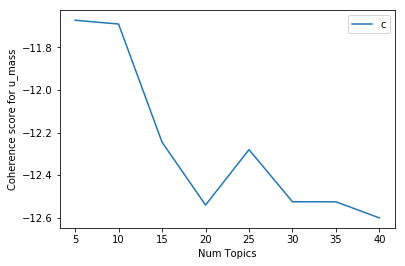

In [22]:
start = 5
limit = 41
step = 5
# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score for u_mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
#run LDA
#change num_topics if want to change the number of topics generated
lda_model = gensim.models.LdaModel(corpus, num_topics=20, id2word=dictionary, random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


NameError: name 'lda_model_tfidf' is not defined

In [24]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.153*"toilet" + 0.146*"fail" + 0.133*"singapor" + 0.096*"public" + 0.062*"flush" + 0.024*"see" + 0.024*"hotel" + 0.018*"illeg" + 0.018*"approach" + 0.018*"sensor"
Topic: 1 
Words: 0.146*"soap" + 0.143*"provid" + 0.142*"suspend" + 0.105*"kovan" + 0.061*"foodcourt" + 0.059*"popular" + 0.027*"food" + 0.023*"court" + 0.010*"coffe" + 0.007*"person"
Topic: 2 
Words: 0.050*"chines" + 0.045*"centr" + 0.033*"game" + 0.024*"siam" + 0.021*"human" + 0.019*"imin" + 0.019*"cool" + 0.019*"signag" + 0.019*"mgyy" + 0.019*"stuff"
Topic: 3 
Words: 0.164*"girl" + 0.041*"sign" + 0.037*"askatan" + 0.037*"hlmulgw" + 0.037*"日本じゃなくてよかった" + 0.008*"pergi" + 0.006*"senyap" + 0.005*"rooftopbar" + 0.005*"sgvbl" + 0.005*"queue"
Topic: 4 
Words: 0.556*"insid" + 0.037*"jack" + 0.027*"fact" + 0.025*"think" + 0.025*"founder" + 0.010*"borrow" + 0.009*"point" + 0.008*"local" + 0.007*"foundat" + 0.006*"build"
Topic: 5 
Words: 0.174*"todayonlin" + 0.129*"upper" + 0.086*"serangoon" + 0.057*"coffe" + 0.029*"